In [38]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', '..', 'pplSIT', 'workflow', 'utils'))

In [40]:
%matplotlib inline

%matplotlib notebook

from imports import *
from matplotlib.patches import ConnectionPatch
from matplotlib.lines import Line2D
import matplotlib.animation as animation
from Behavior.behavior import get_extent, density_map, get_idxs_behav_state

np.set_printoptions(suppress=True)

In [41]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [42]:
source = '/home/sobolev/nevermind/Andrey/data'
source = '/home/sobolev/nevermind/AG_Pecka/data/processed/'

#session = '008229_hippoSIT_2022-05-17_21-44-43'
session = '009266_hippoSIT_2023-04-20_08-57-39'  # general showcase of SIT
animal = session.split('_')[0]

s_path     = os.path.join(source, animal, session)
meta_file  = os.path.join(source, animal, session, 'meta.h5')
desc_file  = os.path.join(source, animal, session, 'descendants.h5')
state_file = os.path.join(source, animal, session, 'analysis', 'state_idxs.h5')

In [7]:
s_rate = 100 # Hz

with h5py.File(meta_file, 'r') as f:
    tl = np.array(f['processed']['timeline'])
    tgt_mx = np.array(f['processed']['target_matrix'])
    events = np.array(f['processed']['sound_events'])
with h5py.File(desc_file, 'r') as f:
    speed = np.array(f['speed'])

In [8]:
# sounds
# idxs_target = np.where(tl[:, 6] == 2)[0]
# idxs_backgr = np.where(tl[:, 6] == 1)[0]
# idxs_noise  = np.where(tl[:, 6] ==-1)[0]
# idxs_reward = trials[trials[:, 5] == 1][:, 1].astype(np.int32)

# # target onsets
# min_dur = 0  # min duration in target, sec
# idxs_to_idx1 = np.where(np.diff(idxs_target) > 5)[0] + 1 # target starts
# idxs_to_idx2 = np.where(np.diff(idxs_target) > 5)[0][1:] # target ends
# idxs_to_idx  = np.where(idxs_to_idx2 - idxs_to_idx1[:-1] > min_dur * 100)[0]
# idxs_tgt_start = idxs_target[:-1][idxs_to_idx1[idxs_to_idx]]

p_sil = tl[events[events[:, 1] == 0][:, 2].astype(np.int32)][:, 0]
p_noi = tl[events[events[:, 1] ==-1][:, 2].astype(np.int32)][:, 0]
p_bgr = tl[events[events[:, 1] == 1][:, 2].astype(np.int32)][:, 0]
p_tgt = tl[events[events[:, 1] == 2][:, 2].astype(np.int32)][:, 0]

<IPython.core.display.Javascript object>


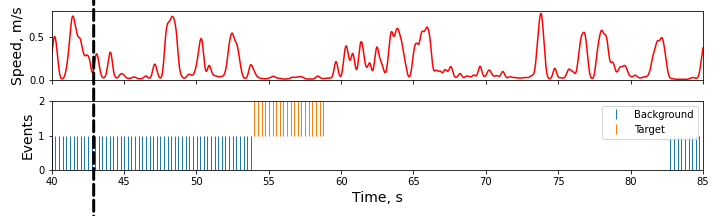

In [35]:
unit_names = ['8-8']
unit_names = []  # no units

t1, t2 = 40, 85

fig = plt.figure(figsize=(10, len(unit_names)*4 + 3))
axes = []


# ----- units
for i, unit_name in enumerate(unit_names):
    with h5py.File(h5name, 'r') as f:
        s_times = np.array(f['units'][unit_name][H5NAMES.spike_times['name']])
        i_rate = np.array(f['units'][unit_name][H5NAMES.inst_rate['name']])
    values = np.random.rand(len(s_times))
    
    ax = fig.add_subplot(len(unit_names)*2 + 2, 1, 2*i+1)
    ax.scatter(s_times, values, s=1)
    ax.set_xlim(t1, t2)
    ax.set_ylabel('Spiking', fontsize=14)
    axes.append(ax)
    
    ax2 = fig.add_subplot(len(unit_names)*2 + 2, 1, 2*i+2)
    ax2.plot(tl[:, 0], i_rate)
    ax2.set_xlim(t1, t2)
    ax2.set_ylabel('Inst. rate, Hz', fontsize=14)
    #ax2.axhline(0.4)
    # TODO: remove ticks!

# ----- speed
ax_s = fig.add_subplot(len(unit_names)*2 + 2, 1, len(unit_names)*2 + 1)
ax_s.plot(tl[:, 0], speed, color='red')
ax_s.set_xlim(t1, t2)
ax_s.set_ylim(0, .8)
ax_s.set_ylabel('Speed, m/s', fontsize=14)
ax_s.xaxis.set_ticklabels([])

if len(axes) == 0:
    axes.append(ax_s)

# ----- events
ax_t = fig.add_subplot(len(unit_names)*2 + 2, 1, len(unit_names)*2 + 2)
#ax_t.scatter(tl[idxs_target][:, 0], 2*np.ones(len(idxs_target)), s=1, color=COLORS[2])
#ax_t.scatter(tl[idxs_backgr][:, 0], np.ones(len(idxs_backgr)), s=1, color=COLORS[4])
#ax_t.scatter(tl[idxs_noise][:, 0],  np.zeros(len(idxs_noise)),  s=1, color=COLORS[3])
#ax_t.scatter(tl[idxs_reward][:, 0], 2 * np.ones(len(idxs_reward)), s=50, color=COLORS[2])
ax_t.vlines(p_bgr, 0, 1, color='tab:blue', lw=1)
ax_t.vlines(p_tgt, 1, 2, color='tab:orange', lw=1)
#ax_t.vlines(p_noi,-1, 0, color='red', lw=1)
ax_t.set_xlim(t1, t2)
ax_t.set_ylim(0, 2)
ax_t.set_ylabel('Events', fontsize=14)
legend_elements = [
    Line2D([0], [0], marker='|', linestyle='None', color='tab:blue', markersize=10, label='Background'),
    Line2D([0], [0], marker='|', linestyle='None', color='tab:orange', markersize=10, label='Target')
]
ax_t.legend(handles=legend_elements, loc='upper right')
ax_t.set_xlabel('Time, s', fontsize=14)

# ----- vertical lines for events
# to_plot = [idxs_tgt_start]
# colors = [COLORS[2], COLORS[2], COLORS[3], COLORS[2]]
# for j, idxs_var in enumerate(to_plot):
#     xy1 = np.vstack([ tl[idxs_var][:, 0],  1.0 * np.ones(len(idxs_var)) ]).T
#     xy3 = np.vstack([ tl[idxs_var][:, 0], -1.5 * np.ones(len(idxs_var)) ]).T
#     for i in range(len(idxs_var)):
#         if xy1[i][0] < t1 or xy1[i][0] > t2:
#             continue
#         con = ConnectionPatch(xyA=xy1[i], coordsA=axes[0].transData, xyB=xy3[i], coordsB=ax_t.transData, color=colors[j])
#         fig.add_artist(con)
        
# ----- time animation line
# https://matplotlib.org/stable/gallery/animation/multiple_axes.html#sphx-glr-gallery-animation-multiple-axes-py
# https://stackoverflow.com/questions/31252107/how-to-draw-vertical-lines-interactively-in-matplotlib
anim_line = ConnectionPatch(xyA=[50, 1], coordsA=axes[0].transData, xyB=[50, -1.5], \
                            coordsB=ax_t.transData, color='black')
anim_line.set(lw=3, ls='--')
fig.add_artist(anim_line)
fig.tight_layout()

def animate(t):
    anim_line.xy1 = (t, 1)
    anim_line.xy2 = (t, -1.5)
    return anim_line

ani = animation.FuncAnimation(fig, animate, interval=50, blit=False, frames=np.linspace(t1, t2, 45*20), repeat_delay=100)

ani.save(os.path.join(report, 'showroom', '%s_%s_%s_1x.mp4' % (session[-19:-6], t1, t2)), writer='ffmpeg', dpi=300, fps=20)

#from IPython.display import HTML
#video = ani.to_html5_video()

## Manifolds

In [88]:
session = '009266_hippoSIT_2023-04-20_08-57-39'
session

'009266_hippoSIT_2023-04-20_08-57-39'

<IPython.core.display.Javascript object>


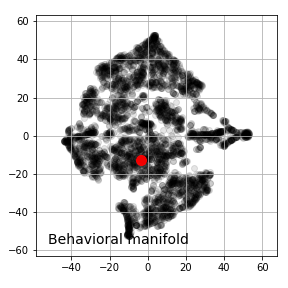

In [89]:
ft = 'tSNE'
fp = 70
animal = session.split('_')[0]
meta_file        = os.path.join(source, animal, session, 'meta.h5')
moseq_class_file = os.path.join(source, animal, session, 'analysis', 'MoSeq_tSNE_UMAP.h5')
desc_file  = os.path.join(source, animal, session, 'descendants.h5')

with h5py.File(meta_file, 'r') as f:
    tl = np.array(f['processed']['timeline'])
    tgt_mx = np.array(f['processed']['target_matrix'])
with h5py.File(moseq_class_file, 'r') as f:
    idxs_srm_tl = np.array(f['idxs_srm_tl'])
    fit = np.array(f[ft][str(fp)])
with h5py.File(desc_file, 'r') as f:
    speed = np.array(f['speed'])

extent = get_extent(fit, margin=10)
b_size = extent[1] - extent[0]

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# just manifold
ax.scatter(fit[:, 0], fit[:, 1], alpha=0.1, color='black')
scat = ax.scatter(fit[:, 0][0], fit[:, 1][0], alpha=0.95, color='red', s=100)
#ax.scatter(fit[108:120, 0], fit[108:120, 1], alpha=0.95, color='red')
ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])
ax.text(extent[0] + 0.05*b_size, extent[2] + 0.05*b_size, 'Behavioral manifold', fontsize=14)
ax.grid()
ax.set_aspect('equal')

fig.tight_layout()

# ----------- animation part

t1, t2 = 40, 85
def update_plot(i, scat):
    idx_srm = np.argmin(np.abs(tl[idxs_srm_tl][:, 0] - i))
    scat.set_offsets([fit[idx_srm][0], fit[idx_srm][1]])
    return scat,

ani = animation.FuncAnimation(fig, update_plot, interval=50, blit=False, \
                    frames=np.linspace(t1, t2, (t2 - t1)*20), repeat_delay=100, fargs=(scat,))
ani.save(os.path.join(report, 'showroom', 'bMAP_%s_%s_%s_1x.mp4' % (session[-19:-6], t1, t2)), writer='ffmpeg', dpi=300, fps=20)

<IPython.core.display.Javascript object>


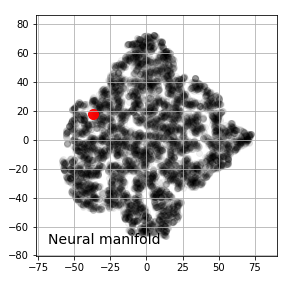

In [90]:
ft = 'tSNE'
fp = 70
animal = session.split('_')[0]
meta_file        = os.path.join(source, animal, session, 'meta.h5')
desc_file  = os.path.join(source, animal, session, 'descendants.h5')
umap_file  = os.path.join(source, animal, session, 'analysis', 'W1-W4_tSNE_UMAP.h5')

with h5py.File(meta_file, 'r') as f:
    tl = np.array(f['processed']['timeline'])
    tgt_mx = np.array(f['processed']['target_matrix'])
    events = np.array(f['processed']['sound_events'])
with h5py.File(umap_file, 'r') as f:
    fit = np.array(f[ft][str(fp)])
with h5py.File(desc_file, 'r') as f:
    speed = np.array(f['speed'])

extent = get_extent(fit, margin=10)
b_size = extent[1] - extent[0]

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# just manifold
ax.scatter(fit[:, 0], fit[:, 1], alpha=0.05, color='black')
scat = ax.scatter(fit[:, 0][0], fit[:, 1][0], alpha=0.95, color='red', s=100)
#ax.scatter(fit[108:120, 0], fit[108:120, 1], alpha=0.95, color='red')
ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])
ax.text(extent[0] + 0.05*b_size, extent[2] + 0.05*b_size, 'Neural manifold', fontsize=14)
ax.grid()
ax.set_aspect('equal')

fig.tight_layout()

# ----------- animation part

t1, t2 = 40, 85
def update_plot(i, scat):
    #idx_srm = np.argmin(np.abs(tl[idxs_srm_tl][:, 0] - i))
    idx_ev  = np.argmin(np.abs(events[:, 0] - i))
    scat.set_offsets([fit[idx_ev][0], fit[idx_ev][1]])
    return scat,

ani = animation.FuncAnimation(fig, update_plot, interval=50, blit=False, \
                    frames=np.linspace(t1, t2, (t2 - t1)*20), repeat_delay=100, fargs=(scat,))

ani.save(os.path.join(report, 'showroom', 'nMAP_%s_%s_%s_1x.mp4' % (session[-19:-6], t1, t2)), writer='ffmpeg', dpi=300, fps=20)